<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_03_reg_lin_grad_descV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Estructura de un problema general de machine learning:
Los modelos de aprendizaje estadístico que pueden ser industriazados,   puede ser [esquematizado](https://proceedings.neurips.cc/paper/2015/file/86df7dcfd896fcaf2674f757a2463eba-Paper.pdf) según se muestra en la siguiente imagen:

![MLOPs](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_MLOP_General.png?raw=true)


![MLOPs](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_MLOPS.png?raw=true)



A partir de ahora, nos concentraremos en entender los modelos de que ocurren dentro de la caja negra, y como encajan dentro de una estructura general de los modelos de machine learning ML.

De forma general un modelo de [ML](https://www.coursera.org/learn/machine-learning)   puede ser visualizado de la siguiente manera :

![SupervisedModel](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_GeneralTraining.png?raw=true)



## ¿Cual es el mejor enfoque para optimizar un problema?

[Non-Free-Lunch-Theorem](https://ieeexplore.ieee.org/document/585893):
Por cada par de algoritmos hay tantos problemas en el que el primer algoritmo es mejor que el segundo como problemas en el que el segundo es mejor que el primero, como consecuencia no existe un unico algoritmo inteligente para optimizar un problema, siempre es recomendable emplear un cierto conocimiento especifico de un problema.



##  Estructura general de los problemas ML:
1. Construir hipotesis.
2. Elegir parametros
3. Elegir la funcion de coste.
4. Minimizar los datos
5. Validar y entrenar.



## Aprendizaje Supervisado :

- Datos etiquetados
- Retroalimentación directa
- Predicción de resultados.










# Regresión lineal:

Supongamos que tenemos un sistema en el que existe un predicor con  **m** valores de entrenamiento,  asi:   $ (x^{(1)}, y^{(1)} ) , (x^{(2)}, y^{(2)}) ... (x^{(m)}, y^{(m)})$


|Training|Y      | X_1  |
|--------|----------|----------|
|1|$Y^{1}$ | $X_1^{1}$|
|2|$Y^{2}$ | $X_1^{2}$|
|.|.         | .        |
|.|.         | .        |
|.|.         | .        |
|m|$Y^{m}$ | $X_1^{m}$  |



Podemos definir un modelo lineal  como : $h(X) = \theta_0 + \theta_1 X$ con $(\theta_0 , \theta_1)$ parámetros. Nuestro objetivo es encontrar el conjunto de puntos  $(\theta_0 , \theta_1)$ que se encuentan más "cercano" a $Y$ para cada $X$.

Para la optimización, vamos a definir la función de coste **$J(\theta_1,\theta_2 )$** para las muestras de entrenamiento como aquella que garantiza la distancia euclidiana respecto a la hipotesis planteada, así:

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( h_{\theta} (x^{(i)})-y^{(i)})^2
\end{equation}

Para encontrar los valores  $(\theta_0 , \theta_1)$ se necesita  minimizar la función de coste, que permite obtener los valores más cercanos,  esta minimización podrá ser realizada a través de diferentes métodos el más conocido es el gradiente descendente.

![](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/fig00.png?raw=true=50x)




Supongamos un modelo lineal para realizar la predicción, así nuestro modelo estará basado en la siguiente hipotesis de trabajo:

$h(X) =\theta_0 + \theta_1 X$


Reemplando el modelo anterior en la función de coste, tenemos que:



\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X)- y^{(i)})^2
\end{equation}



# Laboratorio 03


1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Entrenamiento = np.array([0, 1, 2, 3, 4, 'm'])
Y = np.array([0, 1, 2, 3, 4, 5])
X_1 = np.array([0, 1, 2, 3, 4, 5])

In [3]:
pd = pd.DataFrame({'Entrenamiento':Entrenamiento, 'Y':Y, 'X_1':X_1})

In [4]:
pd

,Entrenamiento,Y,X_1
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
5,m,5,5


2. Crear una función para calcular la función de coste.

\begin{equation}
J(\theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}

**Respuesta:**

Si vectorizamos la función de coste tenemos que:

$$ h_\theta(X) = \theta^T X $$


$$ J(\theta) = \frac{1}{2m} (h_\theta(X) - y)^T (h_\theta(X) - y) $$

In [5]:
# Matriz X, concatena la columna de unos con X_1
X_b = np.c_[np.ones((len(X_1), 1)), X_1].T

# Parpametros iniciales de theta
Theta = np.array([0.5, 0.5])

In [6]:
X_b

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 2., 3., 4., 5.]])

In [7]:
def funcion_coste(X, y, theta):
    
    m = len(y)
    h_X = theta.T @ X # h(X) = theta_0 * X_0 + theta_1 * X
    error = h_X - y
    coste = (1/(2*m)) * error.T @ error
    
    return coste

3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.



In [8]:
# Asumimos theta_0 = 0
Theta[0] = 0

# Valores de theta_1 alrededor de 0
Theta_1 = np.linspace(-10, 10, 1000)

# Coste para cada valor de theta_1
Coste_Theta_1 = [funcion_coste(X_b, Y, np.array([0, i])) for i in Theta_1]

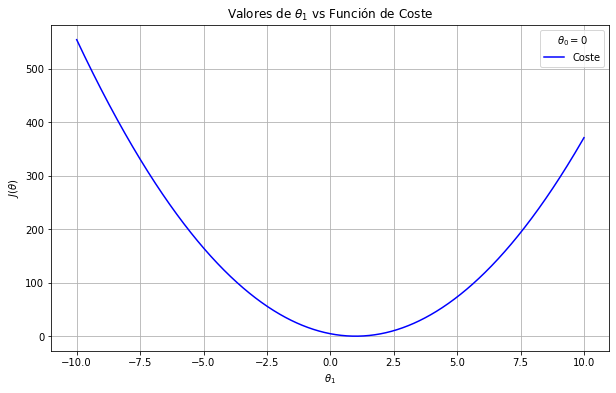

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(Theta_1, Coste_Theta_1, 'b', label='Coste')
plt.title(r'Valores de $\theta_1$ vs Función de Coste')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$J(\theta)$')
plt.legend(title=r'$\theta_0 = 0$')
plt.grid()

In [10]:
# Encontramos el valor mínimo de la funcion de coste

min_coste = np.min(Coste_Theta_1)
print('Coste mínimo:', round(min_coste,4))

# Encontramos el valor de theta_1 que minimiza la función de coste
theta_min = Theta_1[np.argmin(Coste_Theta_1)]
print("Theta_1 que minimiza la función de coste:", round(theta_min,4))

Coste mínimo: 0.0004
Theta_1 que minimiza la función de coste: 0.991


##### Vemos que el valor que parece minimizar el coste es $\theta_1 = 1$


4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```

En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica, análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo se esta realizados  de esta manera, por motivos didácticos.

In [11]:
theta_0 = np.linspace(-5, 5, 100)
theta_1 = np.linspace(-5, 5, 100)

# Creamos la malla que involucra a theta_0 y theta_1
T0, T1 = np.meshgrid(theta_0, theta_1)

# Calculamos el coste para cada combinación de theta_0 y theta_1
J = np.zeros_like(T0)

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        J[i, j] = funcion_coste(X_b, Y, np.array([theta_0[i], theta_1[j]]))

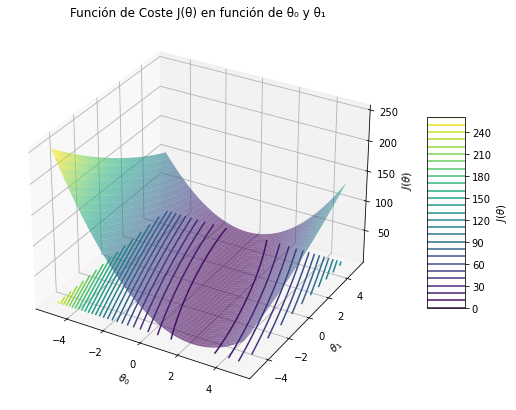

In [12]:
# Graficar la función de coste en 3D
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(T0, T1, J, cmap='viridis', alpha=0.6)
contour = ax.contour(T0, T1, J, zdir='z', offset=np.min(J), levels=30, linestyles="solid", cmap='viridis')

cbar = fig.colorbar(contour, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('$J(\\theta)$')

ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("$J(\\theta)$")
ax.set_title("Función de Coste J(θ) en función de θ₀ y θ₁")

plt.show()

5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.

**Respuesta:**

Sin importar las dimensiones la expresión teórica de la función de coste se conserva en su forma vectorial dada por:

$$ J(\Theta) = \frac{1}{2m} (\Theta^T X - Y)^{T} (\Theta^T X - Y) $$

Donde X será una matriz donde la primera columna estará dada por valores de 1 para multplicar por el intercepto, mientras que las demás columnas serán $X_1, X_2, ... , X_n$ para *n* dimensiones. Mientras que $\Theta$ es el vector de parámetros:

$$ \Theta = [\theta_1 \ \theta_2 \ ... \ \theta_n]^{T} $$

El cuál debe tener el mismo número de filas que la dimensión de X.

In [13]:
# Primera parte terminada

# Gradiente Descendente


Para determinar el mínimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:

- Proponer un número aleatorio inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el mínimo de la función


6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$



In [14]:
def funcion(x):
    return (x-4)**2

def d_funcion(x):
    return 2*(x-4)

def gradiente_descendente(init_x, alpha, epsilon, oscillation_threshold=1E-3, max_oscillations=5):
    x = init_x
    x_vals = [x]
    y_vals = [funcion(x)]
    oscillation_count = 0

    while True:
        grad = d_funcion(x)
        new_x = x - alpha * grad
        x_vals.append(new_x)
        y_vals.append(funcion(new_x))

        print(f'x={new_x:.4f}, f(x)={funcion(new_x):.4f}')

        # Verificar convergencia
        if abs(new_x - x) < epsilon:
            print("Se convirgió al mínimo.")
            break

        # Verificar oscilaciones
        if len(y_vals) > 2 and abs(y_vals[-1] - y_vals[-2]) < oscillation_threshold * epsilon:
            oscillation_count += 1
            print(f'Oscilando. Número de oscilaciones: {oscillation_count}')

            # Si hay demasiadas oscilaciones consecutivas, terminamos
            if oscillation_count >= max_oscillations:
                print("Oscilaciones consecutivas. Saliendo por Estancamiento.")
                break
        else:
            # Resetear el contador de oscilaciones si hay un cambio significativo
            oscillation_count = 0
        
        x = new_x

    return x_vals, y_vals

In [15]:
# Probamos tres valores diferentes de alpha
alphas = [1, 0.75, 0.5, 0.1]
epsilon = 1E-4
init_x = 15

grad_des_a1 = gradiente_descendente(init_x, alphas[0], epsilon)  # Alpha = 1

x=-7.0000, f(x)=121.0000
x=15.0000, f(x)=121.0000
Oscilando. Número de oscilaciones: 1
x=-7.0000, f(x)=121.0000
Oscilando. Número de oscilaciones: 2
x=15.0000, f(x)=121.0000
Oscilando. Número de oscilaciones: 3
x=-7.0000, f(x)=121.0000
Oscilando. Número de oscilaciones: 4
x=15.0000, f(x)=121.0000
Oscilando. Número de oscilaciones: 5
Oscilaciones consecutivas. Saliendo por Estancamiento.


#### Si el valor de $\alpha$ es muy alto entonces nos quedaremos oscilando entre dos valores

In [16]:
grad_des_a2 = gradiente_descendente(init_x, alphas[1], epsilon) # Alpha = 0.75

x=-1.5000, f(x)=30.2500
x=6.7500, f(x)=7.5625
x=2.6250, f(x)=1.8906
x=4.6875, f(x)=0.4727
x=3.6562, f(x)=0.1182
x=4.1719, f(x)=0.0295
x=3.9141, f(x)=0.0074
x=4.0430, f(x)=0.0018
x=3.9785, f(x)=0.0005
x=4.0107, f(x)=0.0001
x=3.9946, f(x)=0.0000
x=4.0027, f(x)=0.0000
x=3.9987, f(x)=0.0000
x=4.0007, f(x)=0.0000
x=3.9997, f(x)=0.0000
x=4.0002, f(x)=0.0000
Oscilando. Número de oscilaciones: 1
x=3.9999, f(x)=0.0000
Oscilando. Número de oscilaciones: 2
x=4.0000, f(x)=0.0000
Oscilando. Número de oscilaciones: 3
x=4.0000, f(x)=0.0000
Se convirgió al mínimo.


In [17]:
grad_des_a3 = gradiente_descendente(init_x, alphas[2], epsilon) # Alpha = 0.5

x=4.0000, f(x)=0.0000
x=4.0000, f(x)=0.0000
Se convirgió al mínimo.


In [18]:
grad_des_a4 = gradiente_descendente(init_x, alphas[3], epsilon) # Alpha = 0.1

x=12.8000, f(x)=77.4400
x=11.0400, f(x)=49.5616
x=9.6320, f(x)=31.7194
x=8.5056, f(x)=20.3004
x=7.6045, f(x)=12.9923
x=6.8836, f(x)=8.3151
x=6.3069, f(x)=5.3216
x=5.8455, f(x)=3.4058
x=5.4764, f(x)=2.1797
x=5.1811, f(x)=1.3950
x=4.9449, f(x)=0.8928
x=4.7559, f(x)=0.5714
x=4.6047, f(x)=0.3657
x=4.4838, f(x)=0.2340
x=4.3870, f(x)=0.1498
x=4.3096, f(x)=0.0959
x=4.2477, f(x)=0.0614
x=4.1982, f(x)=0.0393
x=4.1585, f(x)=0.0251
x=4.1268, f(x)=0.0161
x=4.1015, f(x)=0.0103
x=4.0812, f(x)=0.0066
x=4.0649, f(x)=0.0042
x=4.0519, f(x)=0.0027
x=4.0416, f(x)=0.0017
x=4.0332, f(x)=0.0011
x=4.0266, f(x)=0.0007
x=4.0213, f(x)=0.0005
x=4.0170, f(x)=0.0003
x=4.0136, f(x)=0.0002
x=4.0109, f(x)=0.0001
x=4.0087, f(x)=0.0001
x=4.0070, f(x)=0.0000
x=4.0056, f(x)=0.0000
x=4.0045, f(x)=0.0000
x=4.0036, f(x)=0.0000
x=4.0029, f(x)=0.0000
x=4.0023, f(x)=0.0000
x=4.0018, f(x)=0.0000
x=4.0015, f(x)=0.0000
x=4.0012, f(x)=0.0000
x=4.0009, f(x)=0.0000
x=4.0007, f(x)=0.0000
x=4.0006, f(x)=0.0000
x=4.0005, f(x)=0.0000
x=4

#### Cuando se usa un $\alpha$ muy pequeño es necesario establecer un valor aún más pequeño para el ratio de oscilación, se podría definir en base a este. Además que se pierde mucha eficiencia para llegar al valor deseado.

#### Otra opción a considerar es un usar un alpha variable.

In [19]:
print("Alpha = 1, Iteraciones:", len(grad_des_a1[0]), "Valor final:", round(grad_des_a1[0][-1], 4))
print("Alpha = 0.5, Iteraciones:", len(grad_des_a2[0]), "Valor final:", round(grad_des_a2[0][-1], 4))
print("Alpha = 0.1, Iteraciones:", len(grad_des_a3[0]), "Valor final:", round(grad_des_a3[0][-1], 4))
print("Alpha = 0.01, Iteraciones:", len(grad_des_a4[0]), "Valor final:", round(grad_des_a4[0][-1], 4))

Alpha = 1, Iteraciones: 7 Valor final: 15
Alpha = 0.5, Iteraciones: 20 Valor final: 4.0
Alpha = 0.1, Iteraciones: 3 Valor final: 4.0
Alpha = 0.01, Iteraciones: 47 Valor final: 4.0004


7. Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.

In [20]:
def funcion2d(x, y):
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))

x_vals = np.linspace(-5, 5, 400)
y_vals = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = funcion2d(X, Y)

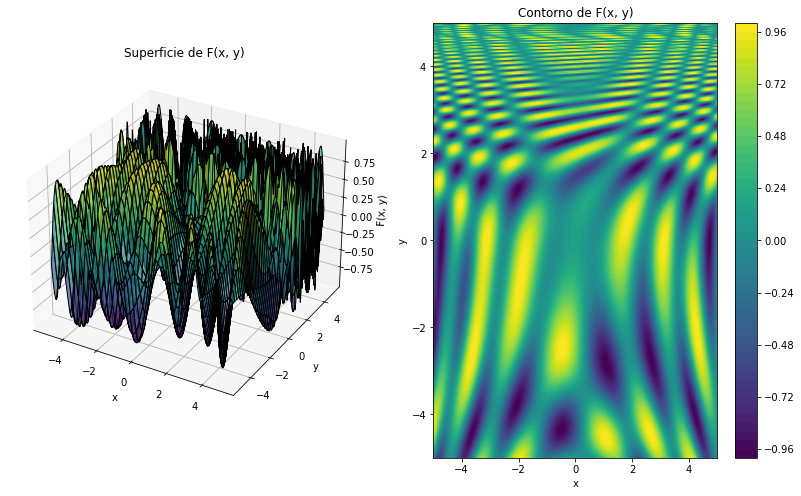

In [21]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('F(x, y)')
ax.set_title('Superficie de F(x, y)')

ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, ax=ax2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contorno de F(x, y)')

plt.show()

In [22]:
# Derivadas parciales calculadas simbólicamente o aproximadas numéricamente
def dF_dx(x, y):
    return x * np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y)) - \
           2 * np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2 * x + 1 - np.exp(y))

def dF_dy(x, y):
    return -0.5 * y * np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y)) + \
           np.exp(y) * np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2 * x + 1 - np.exp(y))

def gradiente_descendente_2d(init_x, init_y, alpha, epsilon, max_iter=1000):
    x, y = init_x, init_y
    for i in range(max_iter):
        grad_x = dF_dx(x, y)
        grad_y = dF_dy(x, y)
        new_x = x - alpha * grad_x
        new_y = y - alpha * grad_y
        
        # Condición de convergencia
        if np.sqrt((new_x - x)**2 + (new_y - y)**2) < epsilon:
            print(f'Convergencia alcanzada en iteración {i}')
            break
        
        x, y = new_x, new_y
        print(f"Iter {i}: x = {x:.4f}, y = {y:.4f}, F(x, y) = {funcion2d(x, y):.4f}")

    return x, y, funcion2d(x, y)

# Ejemplo de uso
init_x, init_y = 2, 2
alpha = 0.01              
epsilon = 1e-4             

min_x, min_y, min_f = gradiente_descendente_2d(init_x, init_y, alpha, epsilon)
print(f"El mínimo encontrado está en x = {min_x:.4f}, y = {min_y:.4f}, con F(x, y) = {min_f:.4f}")

Iter 0: x = 2.0008, y = 1.9666, F(x, y) = 0.4228
Iter 1: x = 2.0071, y = 1.9231, F(x, y) = 0.2068
Iter 2: x = 2.0198, y = 1.8708, F(x, y) = -0.0995
Iter 3: x = 2.0380, y = 1.8152, F(x, y) = -0.4333
Iter 4: x = 2.0581, y = 1.7650, F(x, y) = -0.6965
Iter 5: x = 2.0760, y = 1.7265, F(x, y) = -0.8514
Iter 6: x = 2.0902, y = 1.7000, F(x, y) = -0.9274
Iter 7: x = 2.1007, y = 1.6826, F(x, y) = -0.9618
Iter 8: x = 2.1086, y = 1.6716, F(x, y) = -0.9772
Iter 9: x = 2.1145, y = 1.6646, F(x, y) = -0.9842
Iter 10: x = 2.1192, y = 1.6604, F(x, y) = -0.9876
Iter 11: x = 2.1229, y = 1.6579, F(x, y) = -0.9893
Iter 12: x = 2.1261, y = 1.6566, F(x, y) = -0.9904
Iter 13: x = 2.1288, y = 1.6560, F(x, y) = -0.9911
Iter 14: x = 2.1312, y = 1.6559, F(x, y) = -0.9917
Iter 15: x = 2.1334, y = 1.6561, F(x, y) = -0.9921
Iter 16: x = 2.1355, y = 1.6566, F(x, y) = -0.9926
Iter 17: x = 2.1374, y = 1.6571, F(x, y) = -0.9930
Iter 18: x = 2.1392, y = 1.6578, F(x, y) = -0.9933
Iter 19: x = 2.1410, y = 1.6585, F(x, y) = 

#### Pero como observamos en la gráfica la función tiene un comportamiento periódico por lo que puede ser sensible a los puntos iniciales

In [23]:
init_x, init_y = 5, 5
alpha = 0.01              
epsilon = 1e-4             

min_x, min_y, min_f = gradiente_descendente_2d(init_x, init_y, alpha, epsilon)
print(f"El mínimo encontrado está en x = {min_x:.4f}, y = {min_y:.4f}, con F(x, y) = {min_f:.4f}")

Iter 0: x = 5.0362, y = 4.7950, F(x, y) = 0.4836
Iter 1: x = 4.9938, y = 4.7431, F(x, y) = 0.4040
Iter 2: x = 4.9475, y = 4.8274, F(x, y) = 0.0074
Iter 3: x = 4.9784, y = 4.8236, F(x, y) = -0.1406
Iter 4: x = 5.0255, y = 4.7356, F(x, y) = 0.3929
Iter 5: x = 5.0045, y = 4.2912, F(x, y) = -0.7061
Iter 6: x = 4.9932, y = 4.8044, F(x, y) = 0.1201
Iter 7: x = 4.9668, y = 5.1062, F(x, y) = -0.5641
Iter 8: x = 4.9284, y = 4.9737, F(x, y) = -0.0803
Iter 9: x = 4.9117, y = 5.6147, F(x, y) = 0.7484
Iter 10: x = 4.8870, y = 5.0072, F(x, y) = 0.6030
Iter 11: x = 4.9121, y = 5.4701, F(x, y) = 0.8612
Iter 12: x = 4.8917, y = 6.5039, F(x, y) = 0.8753
Iter 13: x = 4.8701, y = 8.9482, F(x, y) = 0.3840
Iter 14: x = 4.8775, y = -53.8479, F(x, y) = 0.0008
Iter 15: x = 4.8892, y = -53.7837, F(x, y) = -0.2108
Iter 16: x = 4.8679, y = -53.7958, F(x, y) = -0.2508
Iter 17: x = 4.8517, y = -53.7808, F(x, y) = -0.2864
Iter 18: x = 4.8312, y = -53.7890, F(x, y) = -0.3196
Iter 19: x = 4.8161, y = -53.7703, F(x, y)

#### Vemos esto pues partiendo de 2, 2 llegamos al mínimo a F(x,y) = -1, y partiendo de 5, 5 llegamos a F(x,y) = 0.0006.

In [24]:
# Parte 2 Finalizada

# Modelo de *machine learning*: Solución general

Un modelo general para solucionar un problema de machinine learning puede ser estructurado como sigue:


a. Eliger el modelo a emplear:
\begin{equation}
h(X,\Theta)
\end{equation}

- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:

    \begin{equation}
    h(X) = (\theta_0 + \theta_1 X)
    \end{equation}


b. Eligir la funcion de coste :
-  Metrica Ecuclidiana:
\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}
- [Lista de funciones de coste que pueden ser empleadas](https://jmlb.github.io/flashcards/2018/04/21/list_cost_functions_fo_neuralnets/)


c. Aplicar el gradiente descendente iterativamente, hasta encontrar el minimo:  

\begin{equation}
\Delta \vec{\Theta} =  - \alpha \nabla J(\Theta)
\end{equation}



- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:


\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}

8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos de ejemplo
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2 * X + 0.02 * np.random.random(100)

# X_b es una matriz de (2, m) donde la primera fila es de unos
X_b = np.c_[np.ones((len(X), 1)), X].T

np.shape(X_b)


(2, 100)

In [26]:
print(y)

[0.21761058 0.21033339 0.22223196 0.21845743 0.22636173 0.21037486
 0.22127754 0.2239348  0.23070897 0.2305546  0.22924668 0.22482527
 0.24342082 0.23130144 0.2417774  0.24496383 0.23828428 0.23564828
 0.25024754 0.25650699 0.25839208 0.25085216 0.24623515 0.26192345
 0.26663444 0.26247645 0.26797088 0.26823791 0.26443276 0.27441464
 0.26080227 0.27210762 0.27120765 0.27263387 0.2757781  0.28359774
 0.2801757  0.28790355 0.29365396 0.28810829 0.29628794 0.29953224
 0.29297359 0.29888605 0.307482   0.30545836 0.30007793 0.30922865
 0.31509651 0.30617043 0.31819657 0.32228107 0.32076836 0.32427625
 0.3139837  0.32961885 0.31954735 0.32152499 0.33131092 0.33082742
 0.33367642 0.33910081 0.33967419 0.34084012 0.33859161 0.3330777
 0.35215535 0.34911849 0.34632927 0.34546505 0.35293744 0.34687582
 0.35020137 0.36300991 0.35944115 0.36032948 0.36316439 0.35980306
 0.36297365 0.37747469 0.3672997  0.36694331 0.37486877 0.37404877
 0.38670779 0.39050875 0.38714282 0.37619041 0.39144597 0.39692

In [27]:
theta = np.zeros((2, 1))  
alpha = 0.1               
epsilon = 1e-4            
max_iter = 1000           

def coste(X_b, y, theta):
    m = len(y)
    return (1 / (2 * m)) * np.sum((theta.T @ X_b - y) ** 2)


In [28]:
np.shape(X_b)

(2, 100)

In [29]:
np.shape(y)

(100,)

In [30]:
np.shape(theta.T @ X_b - y.T)

(1, 100)

In [31]:
m = len(y)
coste_vals = [coste(X_b, y, theta)]
    
for iteration in range(max_iter):
    error = theta.T@X_b - y.T
    grad = np.dot(error, X_b.T).T

    print(np.shape(theta.T),np.shape(X_b),np.shape(error),np.shape(y))

(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (2, 100) (1, 100) (100,)
(1, 2) (

#### No pudimos usar la forma theta.T @ X por lo que volvimos a la notación del punto que se implementó anteriormente.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.linspace(0, 1, 100)
y = 0.2 + 0.2 * X + 0.02 * np.random.random(100)

X_b = np.c_[np.ones((len(X), 1)), X] 

theta = np.zeros((2, 1)) 
alpha = 0.1              
epsilon = 1e-4           
max_iter = 1000          

y = y.reshape(-1, 1)

def coste(X_b, y, theta):
    m = len(y)
    return (1 / (2 * m)) * np.sum((X_b.dot(theta) - y) ** 2)

def gradiente_descendente(X_b, y, theta, alpha, epsilon, max_iter):
    m = len(y)
    coste_vals = [coste(X_b, y, theta)]
    
    for iteration in range(max_iter):
    
        error = X_b.dot(theta) - y
        grad_theta0 = (1 / m) * np.sum(error)
        grad_theta1 = (1 / m) * np.sum(error * X_b[:, 1].reshape(-1, 1))

        gradients = np.array([[grad_theta0], [grad_theta1]])
        new_theta = theta - alpha * gradients
        
        new_cost = coste(X_b, y, new_theta)
        coste_vals.append(new_cost)
        
        if abs(new_cost - coste_vals[-2]) < epsilon:
            print(f'Convergencia alcanzada en la iteración {iteration + 1}')
            break
        
        theta = new_theta

    return theta, coste_vals

Convergencia alcanzada en la iteración 19
Valores finales: theta_0 = 0.2208, theta_1 = 0.1282


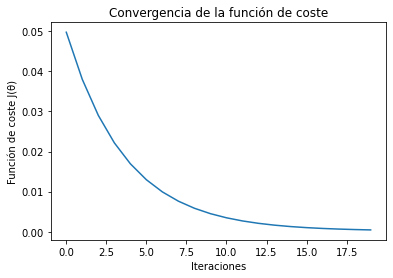

In [33]:

theta, coste_vals = gradiente_descendente(X_b, y, theta, alpha, epsilon, max_iter)

print(f"Valores finales: theta_0 = {theta[0, 0]:.4f}, theta_1 = {theta[1, 0]:.4f}")

plt.plot(coste_vals)
plt.xlabel('Iteraciones')
plt.ylabel('Función de coste J(θ)')
plt.title('Convergencia de la función de coste')
plt.show()

9. Compare su resultado empleando la libreria linearRegresion() de sklearn.

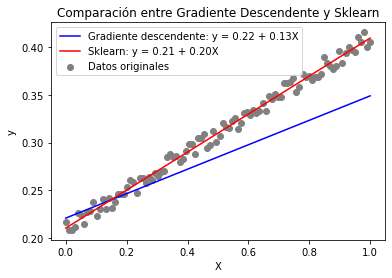

In [34]:
y_pred = X_b.dot(theta)

X_reshape = X.reshape(-1, 1) 
model = LinearRegression().fit(X_reshape, y)
y_sklearn = model.predict(X_reshape)

plt.scatter(X, y, label='Datos originales', color='gray')
plt.plot(X, y_pred, label=f'Gradiente descendente: y = {theta[0, 0]:.2f} + {theta[1, 0]:.2f}X', color='blue')
plt.plot(X, y_sklearn, label=f'Sklearn: y = {model.intercept_[0]:.2f} + {model.coef_[0][0]:.2f}X', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Comparación entre Gradiente Descendente y Sklearn')
plt.show()

Hint:

Pueden comprobar la solución de la superficie con el siguiente cálculo:


\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}



Sea $\Theta^T = [\theta_0,\theta_1]$


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}

Luego:

\begin{equation}
\Lambda = \Theta^T X=
\begin{bmatrix}
(\theta_0 1 + \theta_1 x_1^1)\\
(\theta_0 1 + \theta_1 x_1^2)\\
.\\
.\\
.\\
(\theta_0 1 + \theta_1 x_1^m)\\
\end{bmatrix}
\end{equation}


Sumando sobre todos los elementos de matriz se puede encontrar la función de coste $J = \mathrm{\Lambda.mean()^2}$.